In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, fancy_legend, markers, load_mpl_presets
import numpy as np
import math as m
import vice
import sys
load_mpl_presets()
print(sys.version_info)
sys.path.append("..")
import src

/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


In [18]:
path = "/Volumes/Elements/bimodality-outputs/clumpy-bursts/post-process"
name = "%s/test" % (path)
out = vice.output(name)
extra = np.genfromtxt("%s_analogdata.out" % (out.name))
out.stars["abszfinal"] = [abs(row[-1]) for row in extra[:out.stars.size[0]]]

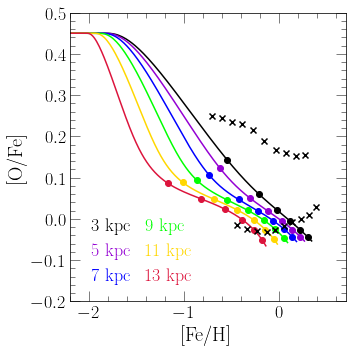

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("[O/Fe]")
ax.set_xlim([-2.2, 0.7])
ax.set_ylim([-0.2, 0.5])

zones = ["zone%d" % (_) for _ in [30, 50, 70, 90, 110, 130]]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]
radii = [3, 5, 7, 9, 11, 13]
times = [2, 4, 6, 8, 10, 12]

for i in range(len(zones)):
    kwargs = {
        "c": named_colors()[colors[i]]
    }
    for j in range(len(times)):
        idx = out.zones[zones[i]].history["time"].index(times[j])
        xval = out.zones[zones[i]].history["[fe/h]"][idx]
        yval = out.zones[zones[i]].history["[o/fe]"][idx]
        ax.scatter(xval, yval, **kwargs)
    kwargs["label"] = "%d kpc" % (radii[i])
    xvals = out.zones[zones[i]].history["[fe/h]"]
    yvals = out.zones[zones[i]].history["[o/fe]"]
    ax.plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 2,
    "handlelength": 0,
    "columnspacing": 0.5
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)
    
higha, lowa = src.data.griffith2021()
kwargs = {
    "c": named_colors()["black"],
    "marker": markers()['x'],
    "zorder": 10
}
ax.scatter(higha["[fe/h]"], higha["[o/fe]"], **kwargs)
ax.scatter(lowa["[fe/h]"], lowa["[o/fe]"], **kwargs)

plt.tight_layout()
plt.show()

In [2]:
path = "/Volumes/Elements/bimodality-outputs/clumpy-bursts/post-process"
names = [
    "%s/high_tau_star" % (path),
    "%s/high_tau_star_eta_var" % (path)
]
outputs = [vice.output(_) for _ in names]
for out in outputs:
    extra = np.genfromtxt("%s_analogdata.out" % (out.name))
    out.stars["abszfinal"] = [abs(row[-1]) for row in extra[:out.stars.size[0]]]

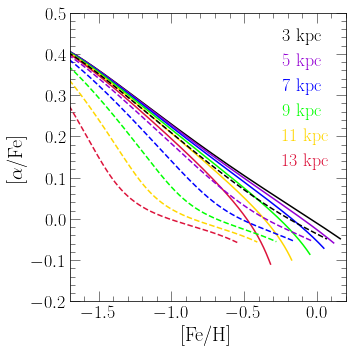

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel(r"[$\alpha$/Fe]")
ax.set_xlim([-1.7, 0.2])
ax.set_ylim([-0.2, 0.5])

zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
radii = [3, 5, 7, 9, 11, 13]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]
linestyles = ["-", "--"]

for i in range(len(outputs)):
    for j in range(len(zones)):
        kwargs = {
            "c": named_colors()[colors[j]],
            "linestyle": linestyles[i]
        }
        if not i: kwargs["label"] = "%d kpc" % (radii[j])
        xvals = outputs[i].zones[zones[j]].history["[fe/h]"]
        yvals = outputs[i].zones[zones[j]].history["[o/fe]"]
        ax.plot(xvals, yvals, **kwargs)
        
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 1,
    "frameon": False,
    "handlelength": 0
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

In [4]:
name = "/Volumes/Elements/bimodality-outputs/clumpy-bursts/post-process/test_ww95"
output = vice.output(name)
extra = np.genfromtxt("%s_analogdata.out" % (output.name))
output.stars["abszfinal"] = [abs(row[-1]) for row in extra[:output.stars.size[0]]]

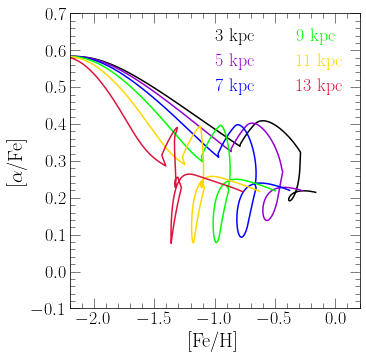

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel(r"[$\alpha$/Fe]")
ax.set_xlim([-2.2, 0.2])
ax.set_ylim([-0.1, 0.7])

zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
radii = [3, 5, 7, 9, 11, 13]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]

for i in range(len(zones)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d kpc" % (radii[i])
    }
    xvals = output.zones[zones[i]].history["[fe/h]"]
    yvals = output.zones[zones[i]].history["[o/fe]"]
    ax.plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 2,
    "handlelength": 0,
    "frameon": False
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

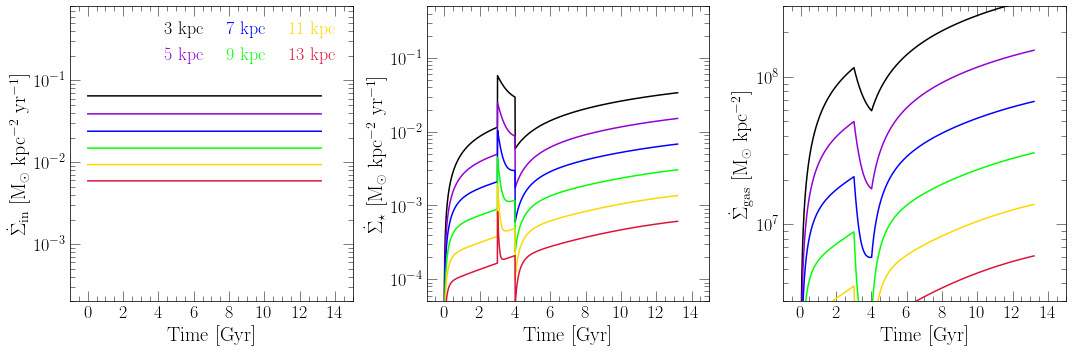

In [6]:
fig = plt.figure(figsize = (15, 5))
axes = []
ylabels = [
    r"$\dot{\Sigma}_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\text{gas}$ [M$_\odot$ kpc$^{-2}$]"
]
ylim = [[2.e-4, 0.8], [5.e-5, 5.e-1], [3.e6, 3.e8]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlabel("Time [Gyr]")
    axes[i].set_ylabel(ylabels[i])
    axes[i].set_yscale("log")
    axes[i].set_xlim([-1, 15])
    axes[i].set_xticks(list(range(0, 16, 2)))
    axes[i].set_ylim(ylim[i])
    
zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]
radii = [3, 5, 7, 9, 11, 13]
zone_width = 0.1

for i in range(len(zones)):
    xvals = output.zones[zones[i]].history["time"]
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d kpc" % (radii[i])
    }
    area = m.pi * ((radii[i] + zone_width)**2 - radii[i]**2)
    yvals = output.zones[zones[i]].history["ifr"]
    yvals = [_ / area for _ in yvals]
    axes[0].plot(xvals, yvals, **kwargs)
    yvals = output.zones[zones[i]].history["sfr"]
    yvals = [_ / area for _ in yvals]
    axes[1].plot(xvals, yvals, **kwargs)
    yvals = output.zones[zones[i]].history["mgas"]
    yvals = [_ / area for _ in yvals]
    axes[2].plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 3,
    "columnspacing": 1.0,
    "frameon": False,
    "handlelength": 0
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

In [2]:
path = "/Volumes/Elements/bimodality-outputs/clumpy-bursts/post-process"
names = [
    "%s/onset3_dur1_10_10" % (path),
    "%s/onset3_dur1_10_1" % (path),
    "%s/onset3_dur1_10_0p5" % (path),
    "%s/onset3_dur1_10_0p2" % (path),
    "%s/onset3_dur1_10_0p1" % (path)
]
outputs = [vice.output(_) for _ in names]
for out in outputs:
    extra = np.genfromtxt("%s_analogdata.out" % (out.name))
    out.stars["abszfinal"] = [abs(row[-1]) for row in extra[:out.stars.size[0]]]

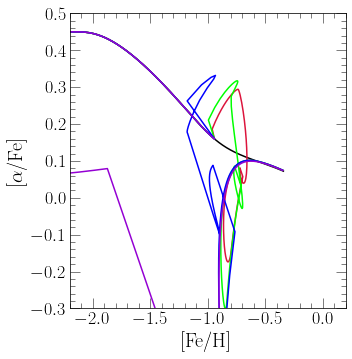

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel(r"[$\alpha$/Fe]")
ax.set_xlim([-2.2, 0.2])
ax.set_ylim([-0.3, 0.5])

zone = "zone80"
colors = ["black", "crimson", "lime", "blue", "darkviolet"]
# labels = ["1x", "10x", "100x", "1000x"]
labels = ["10 Gyr", "1 Gyr", "0.5 Gyr", "0.2 Gyr", "0.1 Gyr"]
# times = list(range(1, 14))
# times = [3, 3.5, 4.0]

for i in range(len(outputs)):
    kwargs = {"c": named_colors()[colors[i]]}
#     for time in times:
#         idx = outputs[i].zones[zone].history["time"].index(time)
#         feh = outputs[i].zones[zone].history["[fe/h]"][idx]
#         ofe = outputs[i].zones[zone].history["[o/fe]"][idx]
#         ax.scatter(feh, ofe, **kwargs)
    kwargs["label"] = labels[i]
    feh = outputs[i].zones[zone].history["[fe/h]"]
    ofe = outputs[i].zones[zone].history["[o/fe]"]
    ax.plot(feh, ofe, **kwargs)

plt.tight_layout()
plt.show()

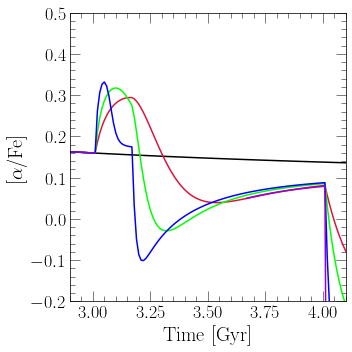

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time [Gyr]")
ax.set_ylabel(r"[$\alpha$/Fe]")
ax.set_xlim([2.9, 4.1])
ax.set_ylim([-0.2, 0.5])

zone = "zone80"
colors = ["black", "crimson", "lime", "blue", "darkviolet"]
# labels = ["1x", "10x", "100x", "1000x"]
labels = ["10 Gyr", "1 Gyr", "0.5 Gyr", "0.2 Gyr", "0.1 Gyr"]
# times = list(range(1, 14))
times = [3, 3.5, 4.0]

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": labels[i]
    }
    time = outputs[i].zones[zone].history["time"]
    ofe = outputs[i].zones[zone].history["[o/fe]"]
    ax.plot(time, ofe, **kwargs)

plt.tight_layout()
plt.show()

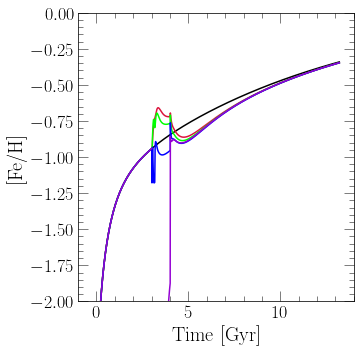

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Time [Gyr]")
ax.set_ylabel("[Fe/H]")
ax.set_xlim([-1, 14])
ax.set_ylim([-2, 0])

zone = "zone80"
colors = ["black", "crimson", "lime", "blue", "darkviolet"]
# labels = ["1x", "10x", "100x", "1000x"]
labels = ["10 Gyr", "1 Gyr", "0.5 Gyr", "0.2 Gyr", "0.1 Gyr"]
# times = list(range(1, 14))
times = [3, 3.5, 4.0]

for i in range(len(outputs)):
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": labels[i]
    }
    time = outputs[i].zones[zone].history["time"]
    feh = outputs[i].zones[zone].history["[fe/h]"]
    ax.plot(time, feh, **kwargs)

plt.tight_layout()
plt.show()

In [2]:
path = "/Volumes/Elements/bimodality-outputs/clumpy-bursts/post-process"
names = [
    "%s/control" % (path),
    "%s/onset2_dur1_5_1" % (path),
    "%s/onset2_dur1_5_0p5" % (path)
]
outputs = [vice.output(_) for _ in names]
for out in outputs:
    extra = np.genfromtxt("%s_analogdata.out" % (out.name))
    out.stars["abszfinal"] = [abs(row[-1]) for row in extra[:out.stars.size[0]]]

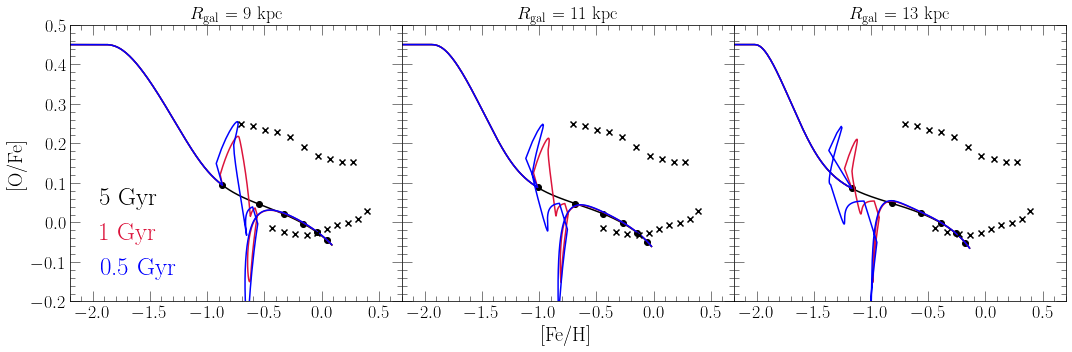

In [3]:
fig = plt.figure(figsize = (15, 5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    if not i: 
        axes[i].set_ylabel("[O/Fe]")
    else:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    if i == 1: axes[i].set_xlabel("[Fe/H]")
    axes[i].set_xlim([-2.2, 0.7])
    axes[i].set_ylim([-0.2, 0.5])
# ax = fig.add_subplot(111)
# ax.set_xlabel("[Fe/H]")
# ax.set_ylabel("[O/Fe]")
# ax.set_xlim([-2.2, 0.7])
# ax.set_ylim([-0.2, 0.5])

# zone = "zone70"
zones = ["zone90", "zone110", "zone130"]
radii = [9, 11, 13]
colors = ["black", "crimson", "blue"]
times = [2, 4, 6, 8, 10, 12]
labels = ["5 Gyr", "1 Gyr", "0.5 Gyr"]
for i in range(len(axes)): axes[i].set_title(r"$R_\text{gal}$ = %d kpc" % (radii[i]))

for zone in zones:
    for i in range(len(outputs)):
        subplot_idx = zones.index(zone)
        kwargs = {"c": named_colors()[colors[i]]}
        if not i:
            for j in range(len(times)):
                idx = outputs[i].zones[zone].history["time"].index(times[j])
                xval = outputs[i].zones[zone].history["[fe/h]"][idx]
                yval = outputs[i].zones[zone].history["[o/fe]"][idx]
                axes[subplot_idx].scatter(xval, yval, **kwargs)
        else: pass
        if zone == zones[0]: kwargs["label"] = labels[i]
        xvals = outputs[i].zones[zone].history["[fe/h]"]
        yvals = outputs[i].zones[zone].history["[o/fe]"]
        axes[subplot_idx].plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 1,
    "handlelength": 0,
    "fontsize": 25
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)

higha, lowa = src.data.griffith2021()
kwargs = {
    "c": named_colors()["black"],
    "marker": markers()['x'],
    "zorder": 10
}
for ax in axes:
    ax.scatter(higha["[fe/h]"], higha["[o/fe]"], **kwargs)
    ax.scatter(lowa["[fe/h]"], lowa["[o/fe]"], **kwargs)

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
plt.show()